In [1]:
import numpy as np

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(int)

In [3]:
# The mevhanism of the step function
x = np.array([-1.0, 1.0, 2.0])
# convert the values to True or False
y = x > 0
print(y)
# convert those boolens to 1 or 0
y.astype(int)

[False  True  True]


array([0, 1, 1])

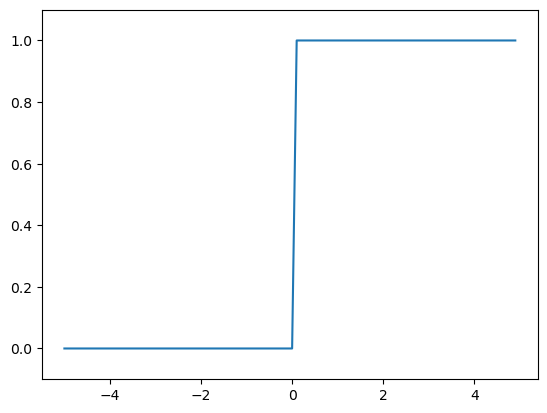

In [4]:
import matplotlib.pylab as plt

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # the range of y
plt.show()

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

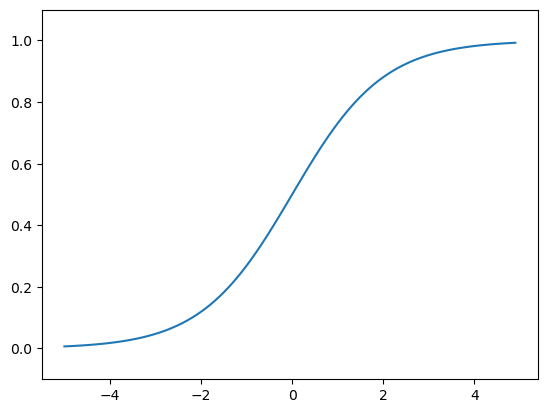

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [8]:
def relu(x):
    return np.maximum(0, x)

In [9]:
x = np.array([-1.0, 1.0, 2.0])
relu(x)

array([0., 1., 2.])

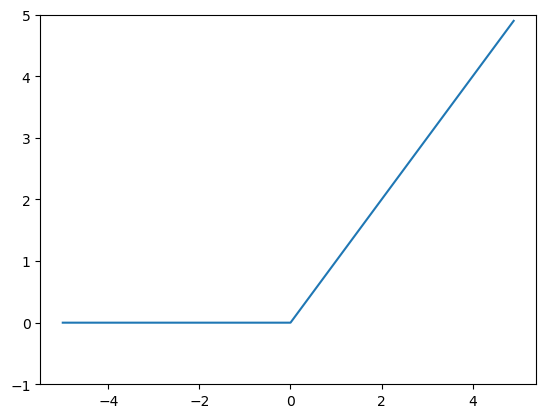

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.0)
plt.show()

In [11]:
# np.dot
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [12]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7, 8, 9])
print(B.shape)
np.dot(B, A)

(3, 2)
(3,)


array([ 76, 100])

In [13]:
A = np.array([[1, 1], [1, 1], [1, 1]])
print(A.shape)
B = np.array([[2], [2]])
print(B.shape)
C = np.array([2, 2])
print(C.shape)
print(np.dot(A, B))
print(np.dot(A, C))
print(np.dot(C, B))

(3, 2)
(2, 1)
(2,)
[[4]
 [4]
 [4]]
[4 4 4]
[8]


In [14]:
def init_network():
    network = {}
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 二次元配列に修正
    network["b1"] = np.array([0.1, 0.3, 0.3])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 二次元配列に修正
    network["b2"] = np.array([0.1, 0.2])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])  # 二次元配列に修正
    network["b3"] = np.array([0.1, 0.2])
    return network

In [15]:
# sigma
def identity_function(x):
    return x

In [16]:
def forward(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

In [17]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31731252 0.69735192]


In [18]:
# The mechanic of softmax
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [19]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y


# this could lead to an overflow

a = np.array([1010, 1000, 990])
y = softmax(a)
print(y)  # overflow because the numbers are too big

[nan nan nan]


C:\Users\jiwon\AppData\Local\Temp\ipykernel_4148\2998573170.py:2: RuntimeWarning: overflow encountered in exp
  exp_a = np.exp(a)
C:\Users\jiwon\AppData\Local\Temp\ipykernel_4148\2998573170.py:4: RuntimeWarning: invalid value encountered in divide
  y = exp_a / sum_exp_a


In [20]:
# The way to avoid the overflow
a = np.array([1010, 1000, 990])

c = np.max(a)
print(c)
print(a - c)

np.exp(a - c) / np.sum(np.exp(a - c))  # the result doesn't get hurt cause it's a divide

1010
[  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [21]:
# The moidified softmax
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y


a = np.array([1010, 1000, 990])
y = softmax(a)
print(y)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [22]:
# 実装済みの関数やクラス(load_mnist)を読み込むには、実装されているファイル(mnist.py)の場所を指定する必要があります。
# そのファイルの位置を示すものをファイルパスと言います。
# ディレクトリ関連(cdなど)の操作をするためのライブラリosをインポート
import os  # パソコンに働きかける

# 現在の作業フォルダ（カレントディレクトリ）を取得(この時点ではc:\Users\jiwon\OneDrive\Desktop\DL1)
print(os.getcwd())

# カレントディレクトリを以下のパスに移動
os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch03")
print(os.getcwd())

# Pythonがモジュールをインポートする際に検索するディレクトリのリストががある。
# ディレクトリをそのリスト（sys.path） に追加することで、
# そのディレクトリ内のモジュールをインポートできるようになります。
import sys  # Pythonに働きかける

sys.path.append(os.pardir)  # ch03から見た親ディレクトリ（deep-learning-from-scratch）を検索リストに追加
print(sys.path)  # sys.pathの確認

from dataset.mnist import load_mnist

c:\Users\jiwon\OneDrive\Desktop\DL1
C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch03
['c:\\Users\\jiwon\\OneDrive\\Desktop\\DL1', 'c:\\Users\\jiwon\\anaconda3\\python311.zip', 'c:\\Users\\jiwon\\anaconda3\\DLLs', 'c:\\Users\\jiwon\\anaconda3\\Lib', 'c:\\Users\\jiwon\\anaconda3', '', 'c:\\Users\\jiwon\\anaconda3\\Lib\\site-packages', 'c:\\Users\\jiwon\\anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\jiwon\\anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\jiwon\\anaconda3\\Lib\\site-packages\\Pythonwin', '..']


In [23]:
from pathlib import Path

# 現在の作業ディレクトリを取得
current_directory = Path.cwd()
print(current_directory)

# 親ディレクトリを取得
parent_directory = current_directory.parent
print(parent_directory)

sys.path.append(parent_directory)
print(sys.path)

from dataset.mnist import load_mnist

C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch03
C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master
['c:\\Users\\jiwon\\OneDrive\\Desktop\\DL1', 'c:\\Users\\jiwon\\anaconda3\\python311.zip', 'c:\\Users\\jiwon\\anaconda3\\DLLs', 'c:\\Users\\jiwon\\anaconda3\\Lib', 'c:\\Users\\jiwon\\anaconda3', '', 'c:\\Users\\jiwon\\anaconda3\\Lib\\site-packages', 'c:\\Users\\jiwon\\anaconda3\\Lib\\site-packages\\win32', 'c:\\Users\\jiwon\\anaconda3\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\jiwon\\anaconda3\\Lib\\site-packages\\Pythonwin', '..', WindowsPath('C:/Users/jiwon/OneDrive/Desktop/deep-learning-from-scratch-master')]


In [24]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [25]:
# 画像（配列）データのロードと画像に現像
import sys, os

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch03")
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

from PIL import Image  # 画像表示のためのモジュール


def img_show(img):  # この時点では画像データはまだ配列データ
    pil_img = Image.fromarray(np.uint8(img))  # 　Imageのfromarrayを使うことで画像に現像しオブジェクト化する
    pil_img.show()


(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [26]:
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [27]:
import numpy as np
import sys, os

os.chdir(r"C:\Users\jiwon\OneDrive\Desktop\deep-learning-from-scratch-master\ch03")
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

In [28]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test  # 推論だけの実装

In [29]:
# 機械にとって読み取りやすいバイナリ形式のデータに変換、復元、保存をするモジュール
# これによって実行中のプログラム（長い計算、ゲーム途中データなど）を保存、復元ができる
import pickle

# print(os.getcwd())


def init_network():
    # print(os.getcwd())
    # withはファイルを使い終わったら自動的に閉じてくれる
    # openでファイルを開きその際モードを指定
    # r: 読み込み専用、b: バイナリーデータ（画像など）
    with open("sample_weight.pkl", "rb") as f:  # 現ディレクトリ（ch03）内のsample_weight.pklをfとして開く
        # pickleファイルの読み込み
        network = pickle.load(f)
        return network

In [30]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [31]:
# The moidified softmax
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [32]:
def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [33]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt / len(x))))

Accuracy: 0.9352


In [34]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [35]:
# predict with batch
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

print(x[:100])

for i in range(0, len(x), batch_size):  # i =  [0, 100, 200, 300, ...]
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i : i + batch_size])  # Trueの合計

print("Accuracy: " + str(float(accuracy_cnt / len(x))))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Accuracy: 0.9352


In [36]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
np.sum(y == t)

[ True  True False  True]


3